### $n_k$ and Heatmap

In [7]:
using JLD, Plots, LaTeXStrings

In [8]:
data = JLD.load("../data/nk_Lx6Ly6_U2.jld")

nk_ce = real(data["nk_ce"])
nk_gce = real(data["nk_gce"]);

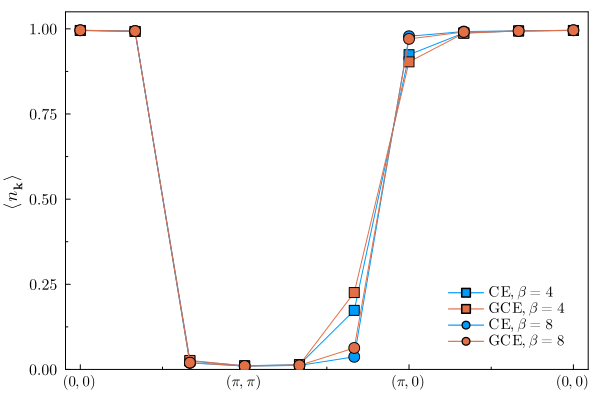

In [9]:
### Plot 1D cut
cur_colors = get_color_palette(:auto, plot_color(:white))

kpath = [15, 22, 29, 36, 35, 34, 33, 27, 21, 15]

ticks = [1, 4, 7, 10]
ticklabels = [L"(0,0)", L"(\pi, \pi)", L"(\pi, 0)", L"(0,0)"]

# β = 4
plt = plot(
    nk_ce[31][kpath], 
    label=L"\mathrm{CE},\beta=4",
    ylabel=L"\langle n_\textbf{k} \rangle",
    xticks=(ticks,ticklabels),
    lc=cur_colors[1],
    marker=(:square, 5), msw=1.2,
    ylim=(0.0,1.05), xminorticks=2, yminorticks=2,
    fontfamily="Computer Modern",
    legendfontsize = 10,
    guidefontsize = 12,
    tickfontsize = 10,
    framestyle=:box, grid=:false,
    legend=:bottomright,
    foreground_color_legend = nothing
)

plot!(
    plt,
    nk_gce[31][kpath], 
    label=L"\mathrm{GCE},\beta=4",
    lc=cur_colors[2],
    marker=(:square, 5), msw=1.2
)

plot!(
    plt,
    nk_ce[71][kpath], 
    label=L"\mathrm{CE},\beta=8",
    lc=cur_colors[1],
    mc=cur_colors[1],
    marker=(:circle, 6), msw=1.2
)

plot!(
    plt,
    nk_gce[71][kpath], 
    label=L"\mathrm{GCE},\beta=8",
    lc=cur_colors[2],
    mc=cur_colors[2],
    marker=(:circle, 6), msw=1.2
)

display(MIME"image/png"(), plt)

In [10]:
savefig("../figures/nk_1Dcut_Lx6Ly6_U2.pdf")
savefig("../figures/nk_1Dcut_Lx6Ly6_U2.svg")

"g:\\My Drive\\JuliaCode\\Plot\\papers-code-CanEnsAFQMC\\figures\\nk_1Dcut_Lx6Ly6_U2.svg"

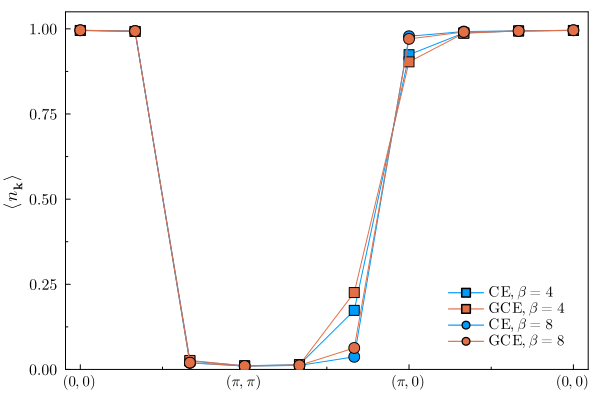

In [11]:
### Plot Heatmap
# heatmap cell elements
using Plots.PlotMeasures

L = length(nk_ce)
χ = zeros(Float64, L, L)
β = collect(1.0:0.1:9.0)

for i in 1 : L
    for j in 1 : L
        χ[j, i] = sum(abs.(nk_ce[i] .- nk_gce[j]))
    end
end

# plot
plt_hm = heatmap(
    β, β, 
    log10.(χ),
    c=cgrad([:blue, :white, :red, :yellow]),
    xlabel=L"\beta_{N}", ylabel=L"\beta_{\mu}",
    colorbar_title = "\n" * L"\log_{10}(\chi(\beta_{N}, \beta(\mu)))",
    fontfamily="Computer Modern",
    ylim=(1,9),
    legendfontsize = 10,
    guidefontsize = 10,
    tickfontsize = 10,
    grid=:false,
    size = (500, 500),
    ratio = 1,
    right_margin = 0.5cm
)

Plots.abline!(
    1, 0,
    line=(:dash, :black), 
    label=nothing
)

display(MIME"image/png"(), plt)

In [12]:
savefig("../figures/nk_heatmap_Lx6Ly6_U2.pdf")
savefig("../figures/nk_heatmap_Lx6Ly6_U2.svg")

"g:\\My Drive\\JuliaCode\\Plot\\papers-code-CanEnsAFQMC\\figures\\nk_heatmap_Lx6Ly6_U2.svg"